In [25]:
# The below cell contains code from Maarten which calculates the propagation time between two points

In [25]:
# The below cell contains code from Maarten which calculates the propagation time between two points

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ssp = [
    [   0, 1520.63],
    [   4.963, 1521.23], 
    [   7.941, 1521.37], 
    [  11.912, 1520.53], 
    [  17.867, 1520.43], 
    [  27.793, 1520.30], 
    [  37.718, 1518.48], 
    [  47.642, 1516.30], 
    [  57.567, 1514.76], 
    [  67.490, 1514.07], 
    [  77.413, 1513.20], 
    [  81.383, 1513.30], 
    [  97.258, 1513.33],
    [ 107.18, 1513.52], 
    [ 156.781, 1514.45], 
    [ 206.371, 1514.76], 
    [ 305.514, 1515.46], 
    [ 404.609, 1516.13], 
    [ 503.657, 1517.18], 
    [ 602.657, 1518.16], 
    [ 701.609, 1519.48], 
    [ 800.515, 1520.88], 
    [ 899.374, 1522.33], 
    [ 998.186, 1523.87], 
    [1096.950, 1525.47], 
    [1195.669, 1527.10], 
    [1294.341, 1528.74], 
    [1392.966, 1530.38], 
    [1491.545, 1532.06], 
    [1590.079, 1533.73], 
    [1688.566, 1535.40], 
    [1787.007, 1537.11], 
    [1885.403, 1538.79], 
    [1983.753, 1540.46], 
    [2082.058, 1542.16], 
    [2180.317, 1543.84], 
    [2278.532, 1545.52], 
    [2376.701, 1547.18],
    [2474.825, 1548.89], 
    [2572.905, 1550.60], 
    [2670.940, 1552.30], 
    [2768.931, 1554.01], 
    [2866.877, 1555.73], 
    [2964.779, 1557.44], 
    [3062.636, 1559.18], 
    [3160.450, 1560.92], 
    [3258.220, 1562.61], 
    [3355.946, 1564.34], 
    [3453.629, 1566.09]]

ssp_Chen_Millero = [
    [   0, 1521.08],
    [   4.963, 1521.08], 
    [   7.941, 1521.08], 
    [  11.912, 1521.14], 
    [  17.867, 1520.91], 
    [  27.793, 1520.72], 
    [  37.718, 1520.38], 
    [  47.642, 1519.73], 
    [  57.567, 1518.97], 
    [  67.490, 1518.29],
    [  77.413, 1517.66], 
    [  81.383, 1517.44],
    [  97.258, 1516.77],
    [ 107.180, 1516.46], 
    [ 156.781, 1515.69], 
    [ 206.371, 1515.44], 
    [ 305.514, 1515.31], 
    [ 404.609, 1515.42], 
    [ 503.657, 1515.66], 
    [ 602.657, 1516.00], 
    [ 701.609, 1516.40], 
    [ 800.515, 1516.88], 
    [ 899.374, 1517.40], 
    [ 998.186, 1517.97], 
    [1096.950, 1518.58], 
    [1195.669, 1519.22], 
    [1294.341, 1519.89], 
    [1392.966, 1520.58], 
    [1491.545, 1521.28], 
    [1590.079, 1522.00], 
    [1688.566, 1522.74], 
    [1787.007, 1523.49], 
    [1885.403, 1524.24], 
    [1983.753, 1525.00], 
    [2082.058, 1525.76], 
    [2180.317, 1526.54], 
    [2278.532, 1527.31], 
    [2376.701, 1528.09],
    [2474.825, 1528.88], 
    [2572.905, 1529.67], 
    [2670.940, 1530.46], 
    [2768.931, 1531.25], 
    [2866.877, 1532.05], 
    [2964.779, 1532.85], 
    [3062.636, 1533.65], 
    [3160.450, 1534.46],
    [3258.220, 1535.26], 
    [3355.946, 1536.07], 
    [3453.629, 1536.88]]

# Maarten Code

In [3]:
class SoundVelocity:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
    
    def __call__(self, z):
        return self.a + self.b * (z - self.c)
    
    def getTime(self, D_m, z1, z2):
        eps = 1.0e-8

        ct = (z2 - z1) / D_m
        v1 = self(z1)
        v2 = self(z2)

        if abs(ct) > eps:
            return abs(math.log(v2/v1) / (ct * self.b))
        else:
            return 2.0 * D_m / (v1 + v2)

In [4]:
# define the range of distance and elevation you want to research
distance = np.linspace(13, 1513, 16)
elevation = np.linspace(5, 705, 8)

# Linear SSP Profile

In [5]:
# original ssp constants
a = 1541.0     # v0
b = 17e-3
c = 2000.00
z0 = 3453.629      # depth of the ocean

# z0 = 3455 gives back Maarten's plot

# calculate the sound velocity
sound_velocity = SoundVelocity(a, b, c)

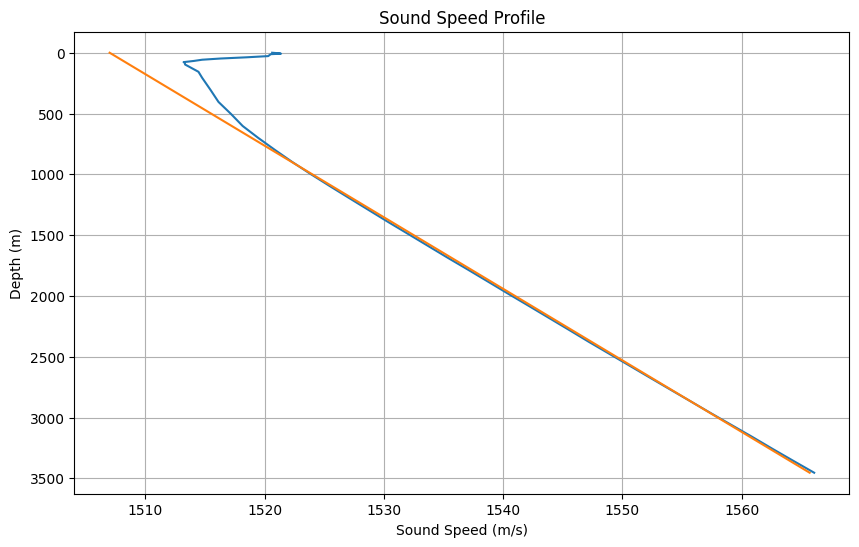

In [99]:
# compare with the original ssp
x_values = [point[1] for point in ssp]
y_values = [point[0] for point in ssp]

velocity_s = []

for i in range(0, len(y_values)):
    d_z = y_values[i]
    v_s = a + b * (d_z - c)
    velocity_s.append(v_s)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, linestyle='-')
plt.plot(velocity_s, y_values)
plt.ylabel('Depth (m)')
plt.xlabel('Sound Speed (m/s)')
plt.title('Sound Speed Profile')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


In [100]:
# initialise an empty list to append values to
propagation_time = []
distance_sea_floor = []
height_DOM = []

# loop through the values to find the propagation time
for i in range(len(distance)):
    for j in range(len(elevation)):
        dis = distance[i]
        el = elevation[j]

        # redefine some parameters
        z1 = z0 - el
        z2 = z0 - 5

        D_m = (dis**2 + (z2 - z1)**2)**(1/2)
        time = sound_velocity.getTime(D_m, z1, z2)

        propagation_time.append(time)
        distance_sea_floor.append(dis)
        height_DOM.append(el)

In [101]:
print(len(propagation_time))

128


In [106]:
data = np.loadtxt('ARCA_1541.0_17e-3_2000_slides.txt', skiprows=1)

time_of_arrival = data[:, 2]
print(len(time_of_arrival))

128


In [107]:
delta_t = (propagation_time - time_of_arrival) * 1e6             # in microseconds

print(sum(np.abs(delta_t)))

# set colorbar values
max = np.max(delta_t)

520.4306790524676


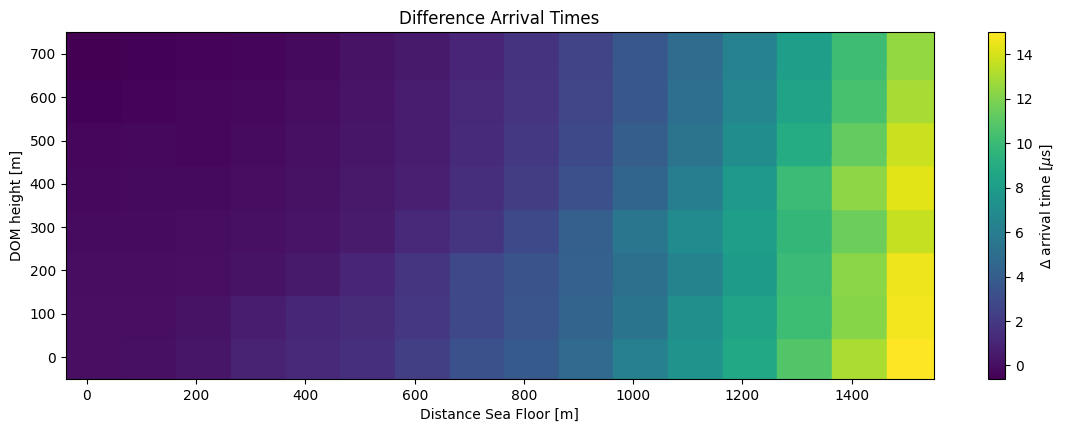

In [108]:
# Create a scatter plot with square markers
# Calculate the difference between consecutive values in x and y directions
dx = np.diff(distance_sea_floor).min()
dy = np.diff(height_DOM).min()

# Create a scatter plot with square markers
plt.figure(figsize=(14, 4.5))
plt.scatter(distance_sea_floor, height_DOM, c=delta_t, cmap='viridis', s=1495, marker='s', alpha=1)
plt.colorbar(label=f'$\Delta$ arrival time [$\mu$s]')
plt.xlabel('Distance Sea Floor [m]')
plt.ylabel('DOM height [m]')
plt.xlim(-39, 1550)
plt.ylim(-50, 750)
plt.title('Difference Arrival Times')

plt.savefig('ARCA difference time.png', transparent=True)
plt.show()
#plt.gca().set_aspect('equal', adjustable='box') 

In [109]:
distance_difference = 1560.92 * (np.max(delta_t)/1e6)

print(f"The max difference in distance could be approximately {distance_difference} m.")

check = 1560.92 * (50/1e6)

print(check)

The max difference in distance could be approximately 0.02341620407484482 m.
0.078046


# Optimised Linear SSP Profile

In [34]:
# original ssp constants
a = 1541.011          # v0
b = 17e-3
c = 2000.00
z0 = 3453.629 

# calculate the sound velocity
sound_velocity = SoundVelocity(a, b, c)

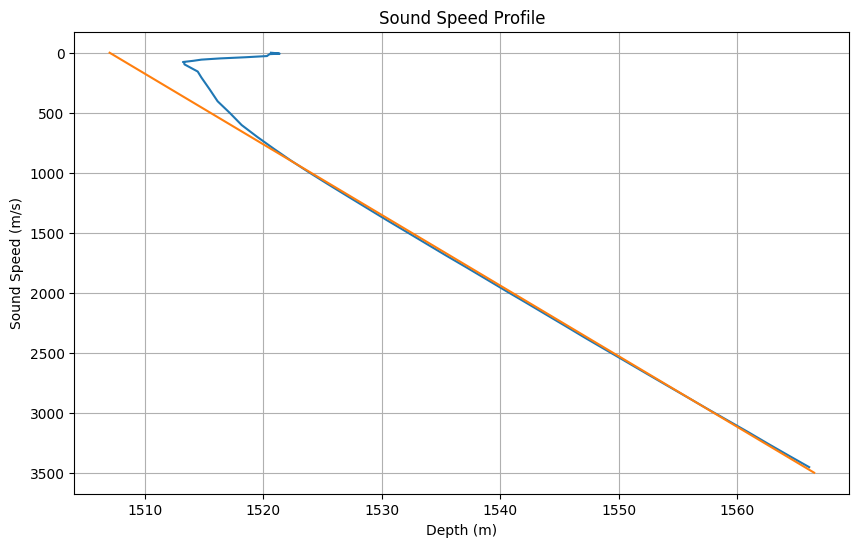

In [35]:
# plot the parametrisation
depth_z = np.linspace(0, 3500, 10)
velocity_s = []

for i in range(0, len(depth_z)):
    d_z = depth_z[i]
    v_s = a + b * (d_z - c)
    velocity_s.append(v_s)


# compare with the original ssp
x_values = [point[1] for point in ssp]
y_values = [point[0] for point in ssp]


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, linestyle='-')
plt.plot(velocity_s, depth_z)
plt.xlabel('Depth (m)')
plt.ylabel('Sound Speed (m/s)')
plt.title('Sound Speed Profile')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


In [36]:
# initialise an empty list to append values to
propagation_time = []
distance_sea_floor = []
height_DOM = []

# loop through the values to find the propagation time
for i in range(len(distance)):
    for j in range(len(elevation)):
        dis = distance[i]
        el = elevation[j]

        # redefine some parameters
        z1 = z0 - el
        z2 = z0 - 5

        D_m = (dis**2 + (z2 - z1)**2)**(1/2)
        time = sound_velocity.getTime(D_m, z1, z2)

        propagation_time.append(time)
        distance_sea_floor.append(dis)
        height_DOM.append(el)

In [37]:
print(len(propagation_time))

128


In [38]:
data = np.loadtxt('ARCA_1541.0_17e-3_2000_slides.txt', skiprows=1)

time_of_arrival = data[:, 2]
print(len(time_of_arrival))

128


In [39]:
delta_t = (propagation_time - time_of_arrival) * 1e6             # in microseconds

min = np.min(delta_t)

print(sum(np.abs(delta_t)))

307.3961146047109


summed difference

292.6121733775131


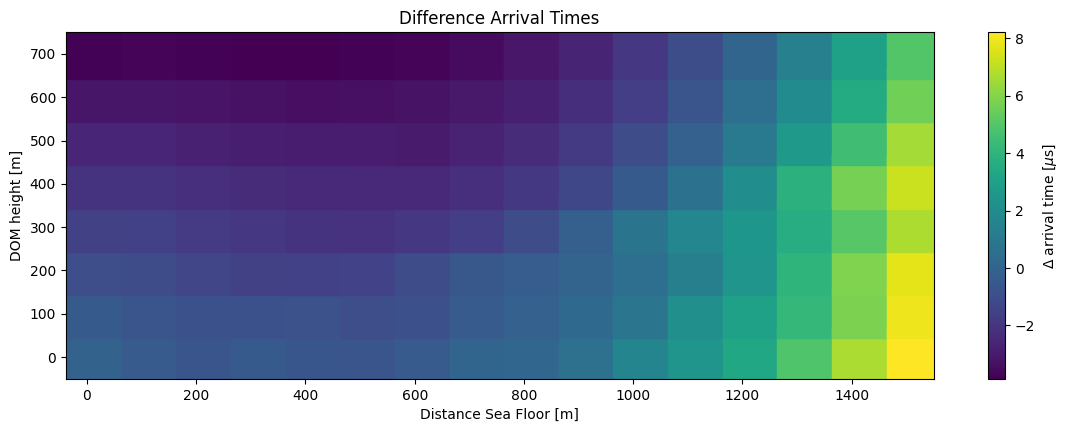

In [41]:
# Create a scatter plot with square markers
# Calculate the difference between consecutive values in x and y directions
dx = np.diff(distance_sea_floor).min()
dy = np.diff(height_DOM).min()

# Create a scatter plot with square markers
plt.figure(figsize=(14, 4.5))
plt.scatter(distance_sea_floor, height_DOM, c=delta_t, cmap='viridis', s=1495, marker='s', alpha=1)
plt.colorbar(label=f'$\Delta$ arrival time [$\mu$s]')
plt.xlabel('Distance Sea Floor [m]')
plt.ylabel('DOM height [m]')
plt.xlim(-39, 1550)
plt.ylim(-50, 750)
plt.title('Difference Arrival Times')

plt.savefig('ARCA difference time.png', transparent=True)
plt.show()
#plt.gca().set_aspect('equal', adjustable='box') 

# Delgrosso SSP Profile

In [21]:
# original ssp constants
a = 1541.0     # v0
b = 17e-3
c = 2000.00
z0 = 3453.629      # depth of the ocean

# z0 = 3455 gives back Maarten's plot

# calculate the sound velocity
sound_velocity = SoundVelocity(a, b, c)

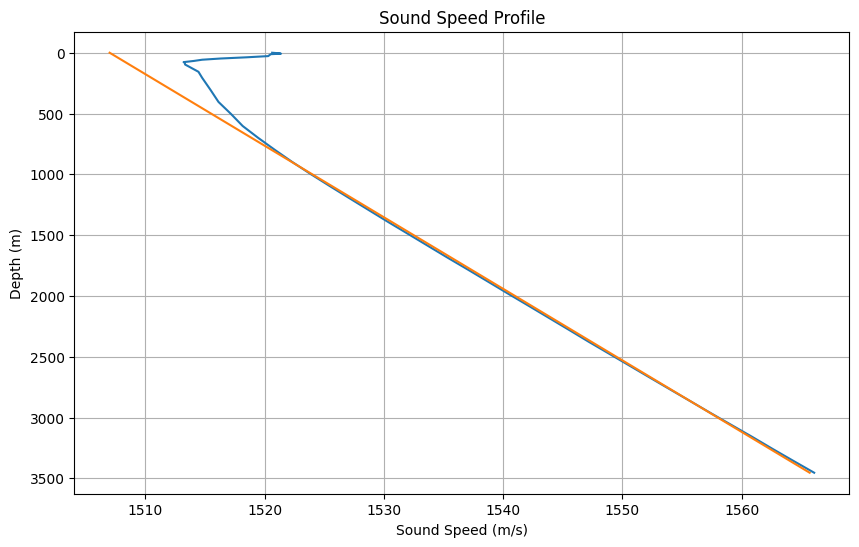

[13.63000000000011, 14.145629000000099, 14.235002999999779, 13.327495999999883, 13.126261000000113, 12.827518999999938, 10.838794000000007, 8.49008600000002, 6.781361000000061, 5.9226699999999255, 4.883978999999954, 4.916488999999956, 4.676613999999972, 4.697940000000017, 4.784722999999985, 4.251692999999932, 3.266262000000097, 2.251647000000048, 1.6178310000000238, 0.9148310000000492, 0.552646999999979, 0.2712450000001354, 0.04064199999993434, -0.09916200000020581, -0.17814999999995962, -0.22637300000019422, -0.2637970000000678, -0.3004219999997986, -0.2962649999999485, -0.30134300000008807, -0.3056219999998575, -0.26911900000004607, -0.26185099999997874, -0.2638010000000577, -0.2349859999999353, -0.22538900000017748, -0.21504400000003443, -0.22391700000002857, -0.18202499999983957, -0.13938500000017484, -0.10598000000004504, -0.06182699999999386, -0.006908999999950538, 0.03875700000003235, 0.11518799999998919, 0.1923500000000331, 0.2202599999998256, 0.2889179999999669, 0.378306999999

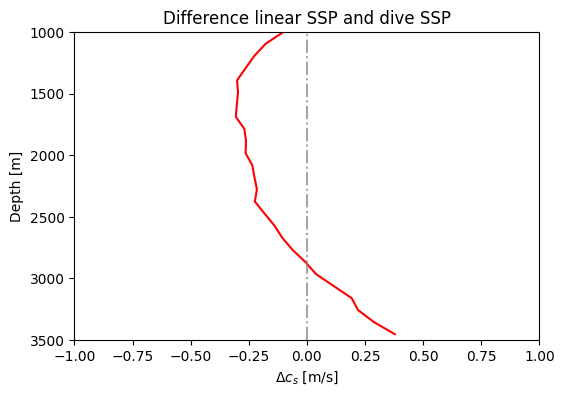

In [46]:
# compare with the original ssp
x_values = [point[1] for point in ssp]
y_values = [point[0] for point in ssp]

velocity_s = []

for i in range(0, len(y_values)):
    d_z = y_values[i]
    v_s = a + b * (d_z - c)
    velocity_s.append(v_s)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, linestyle='-')
plt.plot(velocity_s, y_values)
plt.ylabel('Depth (m)')
plt.xlabel('Sound Speed (m/s)')
plt.title('Sound Speed Profile')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


difference = [i - j  for i,j in zip(x_values, velocity_s)]
print(difference)


plt.figure(figsize=(6, 4))

plt.title("Difference linear SSP and dive SSP")
plt.plot(difference, y_values, color="red")
plt.ylim(1000, 3500)
plt.ylabel("Depth [m]")
plt.xlabel("$\Delta c_s$ [m/s]")
plt.axvline(0, linestyle="dashdot", color="gray", alpha=0.7)
plt.gca().invert_yaxis()
plt.xlim(-1,1)
plt.savefig("Delta SSP.png", transparent=True)
plt.show()

In [8]:
# initialise an empty list to append values to
propagation_time = []
distance_sea_floor = []
height_DOM = []

# loop through the values to find the propagation time
for i in range(len(distance)):
    for j in range(len(elevation)):
        dis = distance[i]
        el = elevation[j]

        # redefine some parameters
        z1 = z0 - el
        z2 = z0 - 5

        D_m = (dis**2 + (z2 - z1)**2)**(1/2)
        time = sound_velocity.getTime(D_m, z1, z2)

        propagation_time.append(time)
        distance_sea_floor.append(dis)
        height_DOM.append(el)

In [86]:
print(len(propagation_time))

128


In [9]:
data = np.loadtxt('ARCA_1541.0_17e-3_2000_slides_Delgrosso.txt', skiprows=1)

time_of_arrival = data[:, 2]
print(len(time_of_arrival))

128


In [10]:
delta_t = (propagation_time - time_of_arrival) * 1e6             # in microseconds

print(sum(np.abs(delta_t)))

# set colorbar values
max = np.max(delta_t)

11773.418198475261


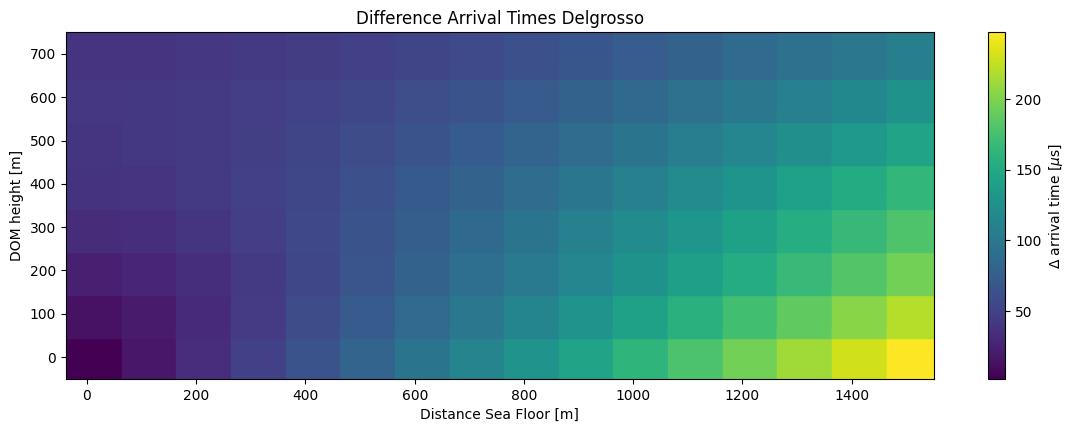

In [23]:
# Create a scatter plot with square markers
# Calculate the difference between consecutive values in x and y directions
dx = np.diff(distance_sea_floor).min()
dy = np.diff(height_DOM).min()

# Create a scatter plot with square markers
plt.figure(figsize=(14, 4.5))
plt.scatter(distance_sea_floor, height_DOM, c=delta_t, cmap='viridis', s=1495, marker='s', alpha=1)
plt.colorbar(label=f'$\Delta$ arrival time [$\mu$s]')
plt.xlabel('Distance Sea Floor [m]')
plt.ylabel('DOM height [m]')
plt.xlim(-39, 1550)
plt.ylim(-50, 750)
plt.title('Difference Arrival Times Delgrosso')

plt.savefig('ARCA difference time Delgrosso.png', transparent=True)
plt.show()
#plt.gca().set_aspect('equal', adjustable='box') 

# Chen-Millero SSP Profile

In [58]:
# original ssp constants
a = 1541.00     # v0
b = 17e-3
c = 2000.00
z2 = 3453.629 

# calculate the sound velocity
sound_velocity = SoundVelocity(a, b, c)

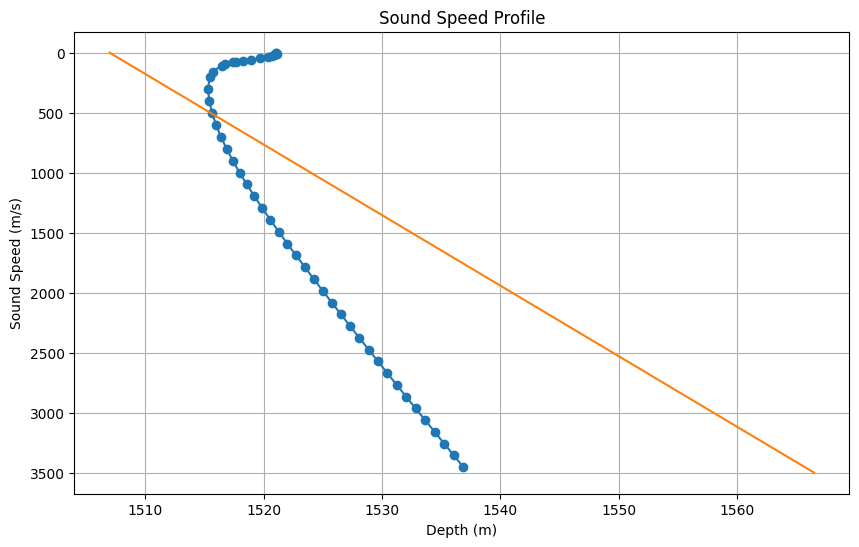

In [61]:
# plot the parametrisation
depth_z = np.linspace(0, 3500, 10)
velocity_s = []

for i in range(0, len(depth_z)):
    d_z = depth_z[i]
    v_s = a + b * (d_z - c)
    velocity_s.append(v_s)


# compare with the original ssp
x_values = [point[1] for point in ssp_Chen_Millero]
y_values = [point[0] for point in ssp_Chen_Millero]


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.plot(velocity_s, depth_z)
plt.xlabel('Depth (m)')
plt.ylabel('Sound Speed (m/s)')
plt.title('Sound Speed Profile')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


In [62]:
# initialise an empty list to append values to
propagation_time = []
distance_sea_floor = []
height_DOM = []

# loop through the values to find the propagation time
for i in range(len(distance)):
    for j in range(len(elevation)):
        dis = distance[i]
        el = elevation[j]

        # redefine some parameters
        z1 = z0 - el
        z2 = z0 - 5

        D_m = (dis**2 + (z2 - z1)**2)**(1/2)
        time = sound_velocity.getTime(D_m, z1, z2)

        propagation_time.append(time)
        distance_sea_floor.append(dis)
        height_DOM.append(el)

In [63]:
print(len(propagation_time))

128


In [64]:
data = np.loadtxt('ARCA_1541.0_17e-3_2000_slides_Chen_Millero.txt', skiprows=1)

time_of_arrival = data[:, 2]
print(len(time_of_arrival))

128


In [65]:
delta_t = (propagation_time - time_of_arrival) * 1e6             # in microseconds

print(sum(np.abs(delta_t)))

# set colorbar values
max = np.max(delta_t)

1297073.5191415246


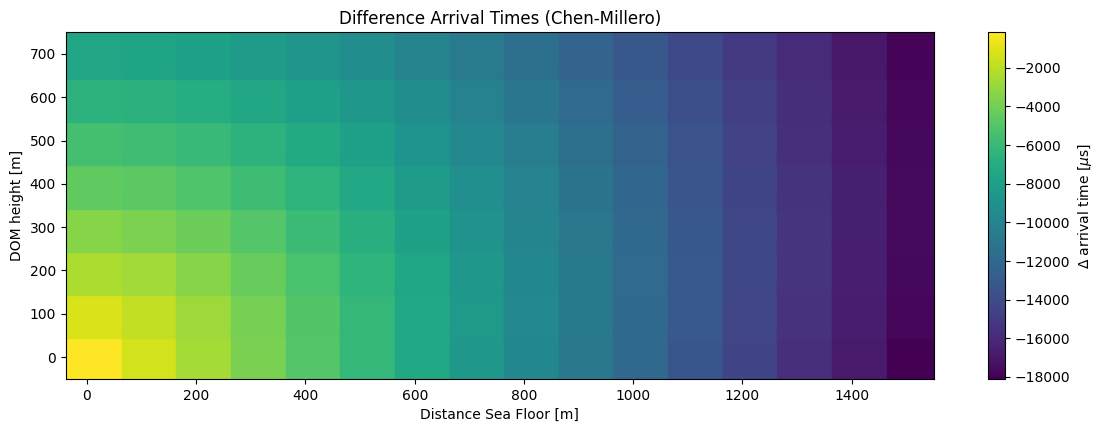

In [68]:
# Create a scatter plot with square markers
# Calculate the difference between consecutive values in x and y directions
dx = np.diff(distance_sea_floor).min()
dy = np.diff(height_DOM).min()

# Create a scatter plot with square markers
plt.figure(figsize=(14, 4.5))
plt.scatter(distance_sea_floor, height_DOM, c=delta_t, cmap='viridis', s=1495, marker='s', alpha=1)
plt.colorbar(label=f'$\Delta$ arrival time [$\mu$s]')
plt.xlabel('Distance Sea Floor [m]')
plt.ylabel('DOM height [m]')
plt.xlim(-39, 1550)
plt.ylim(-50, 750)
plt.title('Difference Arrival Times (Chen-Millero)')

plt.savefig('ARCA difference time Chen-Millero.png', transparent=True)
plt.show()
#plt.gca().set_aspect('equal', adjustable='box') 

# Linear SSP Profile + 1 m/s

In [111]:
# original ssp constants
a = 1541.0     # v0
b = 17e-3
c = 2000.00
z0 = 3453.629      # depth of the ocean

# z0 = 3455 gives back Maarten's plot

# calculate the sound velocity
sound_velocity = SoundVelocity(a, b, c)

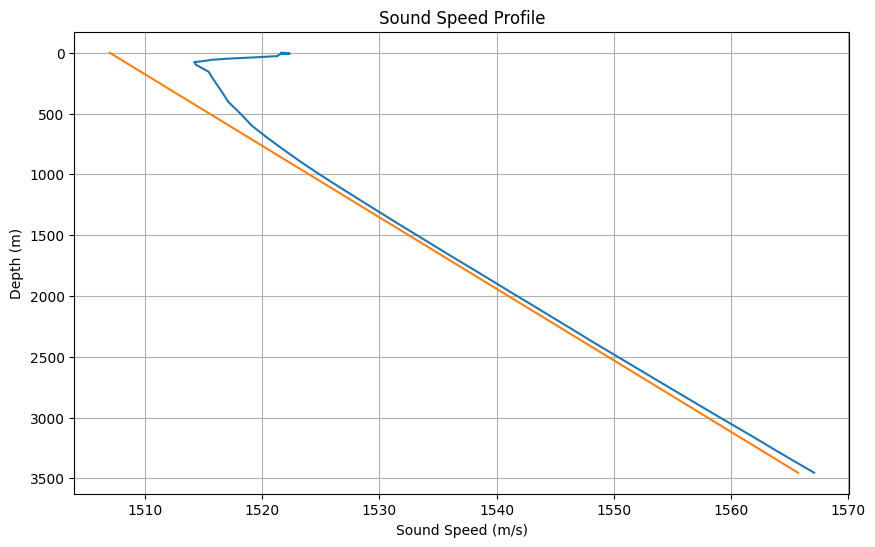

In [112]:
# compare with the original ssp
x_values = [point[1]+1 for point in ssp]
y_values = [point[0] for point in ssp]

velocity_s = []

for i in range(0, len(y_values)):
    d_z = y_values[i]
    v_s = a + b * (d_z - c)
    velocity_s.append(v_s)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, linestyle='-')
plt.plot(velocity_s, y_values)
plt.ylabel('Depth (m)')
plt.xlabel('Sound Speed (m/s)')
plt.title('Sound Speed Profile')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


In [113]:
# initialise an empty list to append values to
propagation_time = []
distance_sea_floor = []
height_DOM = []

# loop through the values to find the propagation time
for i in range(len(distance)):
    for j in range(len(elevation)):
        dis = distance[i]
        el = elevation[j]

        # redefine some parameters
        z1 = z0 - el
        z2 = z0 - 5

        D_m = (dis**2 + (z2 - z1)**2)**(1/2)
        time = sound_velocity.getTime(D_m, z1, z2)

        propagation_time.append(time)
        distance_sea_floor.append(dis)
        height_DOM.append(el)

In [114]:
print(len(propagation_time))

128


In [115]:
data = np.loadtxt('ARCA_1541.0_17e-3_2000_slides_+1.txt', skiprows=1)

time_of_arrival = data[:, 2]
print(len(time_of_arrival))

128


In [116]:
delta_t = (propagation_time - time_of_arrival) * 1e6             # in microseconds

print(sum(np.abs(delta_t)))

# set colorbar values
max = np.max(delta_t)

47456.406108475356


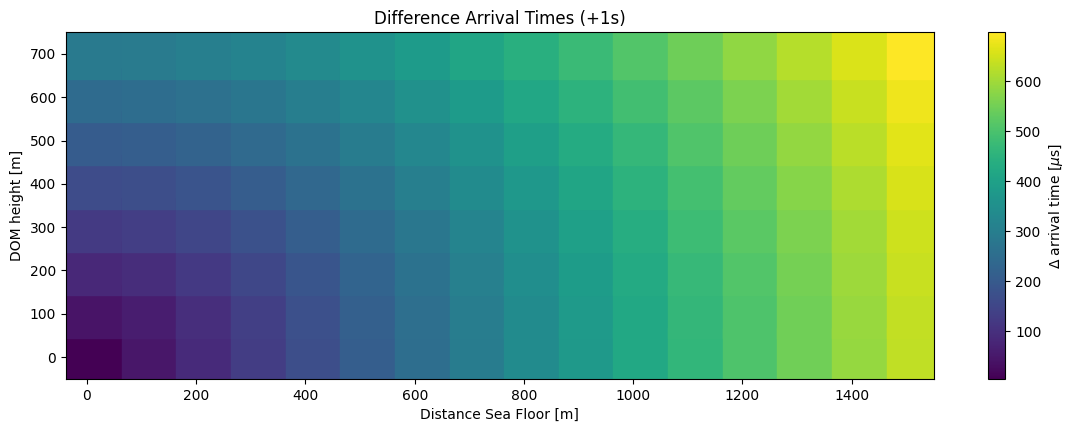

In [117]:
# Create a scatter plot with square markers
# Calculate the difference between consecutive values in x and y directions
dx = np.diff(distance_sea_floor).min()
dy = np.diff(height_DOM).min()

# Create a scatter plot with square markers
plt.figure(figsize=(14, 4.5))
plt.scatter(distance_sea_floor, height_DOM, c=delta_t, cmap='viridis', s=1495, marker='s', alpha=1)
plt.colorbar(label=f'$\Delta$ arrival time [$\mu$s]')
plt.xlabel('Distance Sea Floor [m]')
plt.ylabel('DOM height [m]')
plt.xlim(-39, 1550)
plt.ylim(-50, 750)
plt.title('Difference Arrival Times (+1s)')

plt.savefig('ARCA difference time +1s.png', transparent=True)
plt.show()
#plt.gca().set_aspect('equal', adjustable='box') 

# Linear SSP Profile + 0.1 m/s

In [26]:
# original ssp constants
a = 1541.0     # v0
b = 17e-3
c = 2000.00
z0 = 3453.629      # depth of the ocean

# z0 = 3455 gives back Maarten's plot

# calculate the sound velocity
sound_velocity = SoundVelocity(a, b, c)

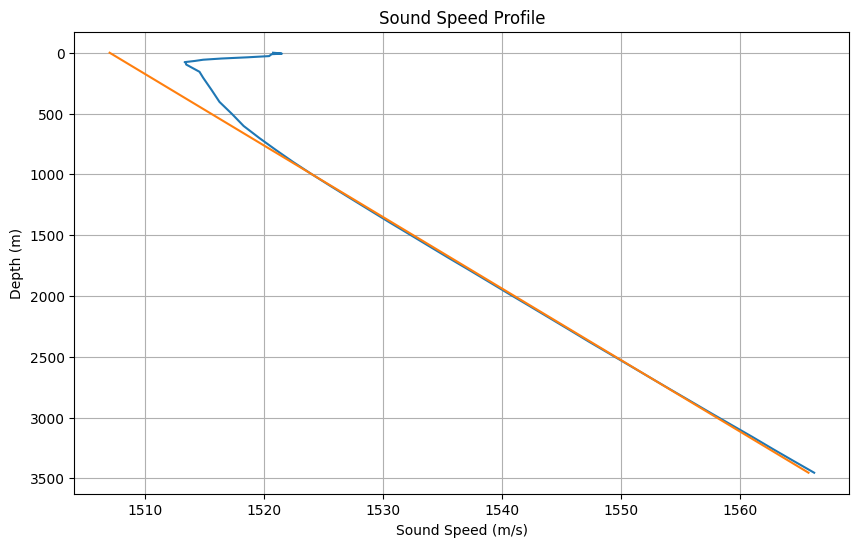

In [27]:
# compare with the original ssp
x_values = [point[1]+0.1 for point in ssp]
y_values = [point[0] for point in ssp]

velocity_s = []

for i in range(0, len(y_values)):
    d_z = y_values[i]
    v_s = a + b * (d_z - c)
    velocity_s.append(v_s)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, linestyle='-')
plt.plot(velocity_s, y_values)
plt.ylabel('Depth (m)')
plt.xlabel('Sound Speed (m/s)')
plt.title('Sound Speed Profile')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


In [28]:
# initialise an empty list to append values to
propagation_time = []
distance_sea_floor = []
height_DOM = []

# loop through the values to find the propagation time
for i in range(len(distance)):
    for j in range(len(elevation)):
        dis = distance[i]
        el = elevation[j]

        # redefine some parameters
        z1 = z0 - el
        z2 = z0 - 5

        D_m = (dis**2 + (z2 - z1)**2)**(1/2)
        time = sound_velocity.getTime(D_m, z1, z2)

        propagation_time.append(time)
        distance_sea_floor.append(dis)
        height_DOM.append(el)

In [29]:
print(len(propagation_time))

128


In [30]:
data = np.loadtxt('ARCA_1541.0_17e-3_2000_slides_+0.1.txt', skiprows=1)

time_of_arrival = data[:, 2]
print(len(time_of_arrival))

128


In [31]:
delta_t = (propagation_time - time_of_arrival) * 1e6             # in microseconds

print(sum(np.abs(delta_t)))

# set colorbar values
max = np.max(delta_t)

5205.146008475478


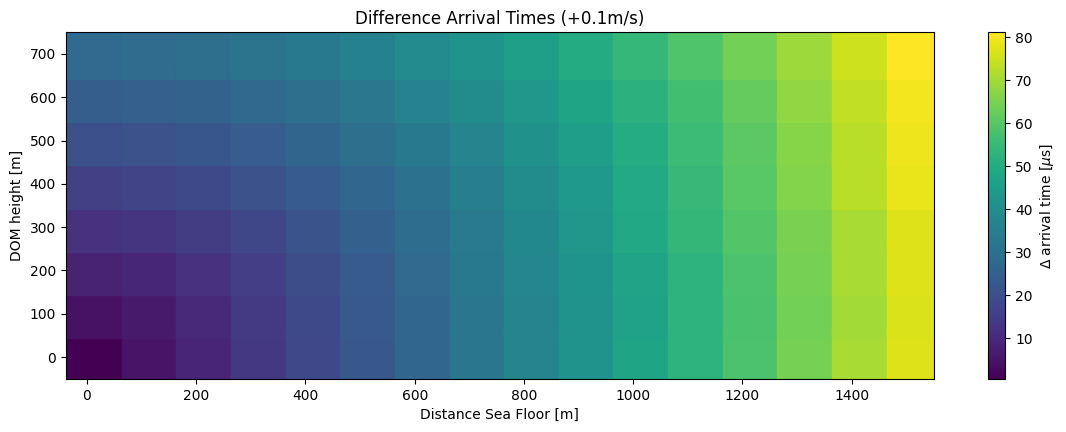

In [32]:
# Create a scatter plot with square markers
# Calculate the difference between consecutive values in x and y directions
dx = np.diff(distance_sea_floor).min()
dy = np.diff(height_DOM).min()

# Create a scatter plot with square markers
plt.figure(figsize=(14, 4.5))
plt.scatter(distance_sea_floor, height_DOM, c=delta_t, cmap='viridis', s=1495, marker='s', alpha=1)
plt.colorbar(label=f'$\Delta$ arrival time [$\mu$s]')
plt.xlabel('Distance Sea Floor [m]')
plt.ylabel('DOM height [m]')
plt.xlim(-39, 1550)
plt.ylim(-50, 750)
plt.title('Difference Arrival Times (+0.1m/s)')

plt.savefig('ARCA difference time 0.1s.png', transparent=True)
plt.show()
#plt.gca().set_aspect('equal', adjustable='box') 